In [1]:
!pip install opendatasets


In [2]:
import opendatasets as od

In [3]:
Data = 'https://www.kaggle.com/datasets/mathchi/diabetes-data-set' 

In [4]:
od.download(Data)

Skipping, found downloaded files in ".\diabetes-data-set" (use force=True to force download)


In [5]:
import os 


In [6]:
data_dir = '.\diabetes-data-set'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\niran\AppData\Local\Temp\ipykernel_15016\4124441138.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_dir = '.\diabetes-data-set'


In [7]:
os.listdir(data_dir)


['diabetes.csv']

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('diabetes.csv')


In [10]:
data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Python libraries
!pip install lightgbm
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold


In [13]:
# Stats
import scipy.stats as ss
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [14]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

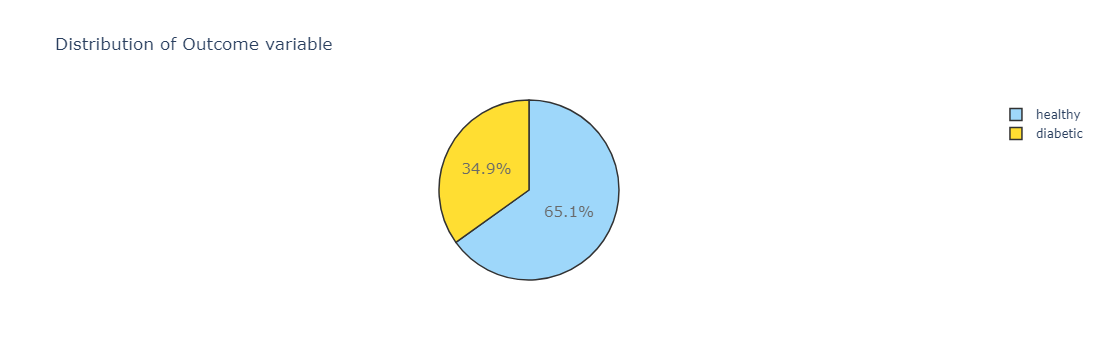

In [15]:
target_percent()

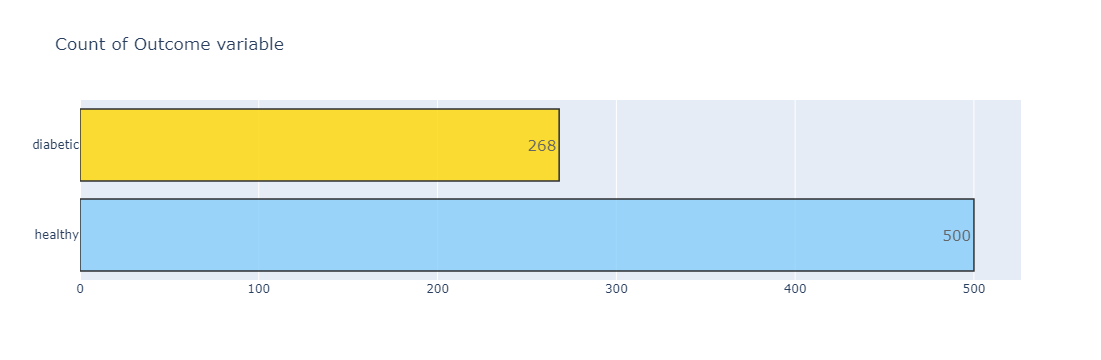

In [16]:
target_count()

In [17]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [18]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

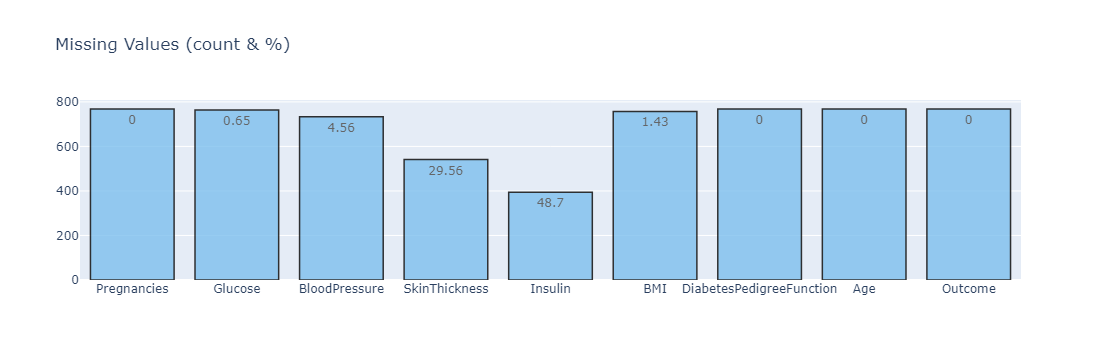

In [19]:
missing_plot(data, 'Outcome')

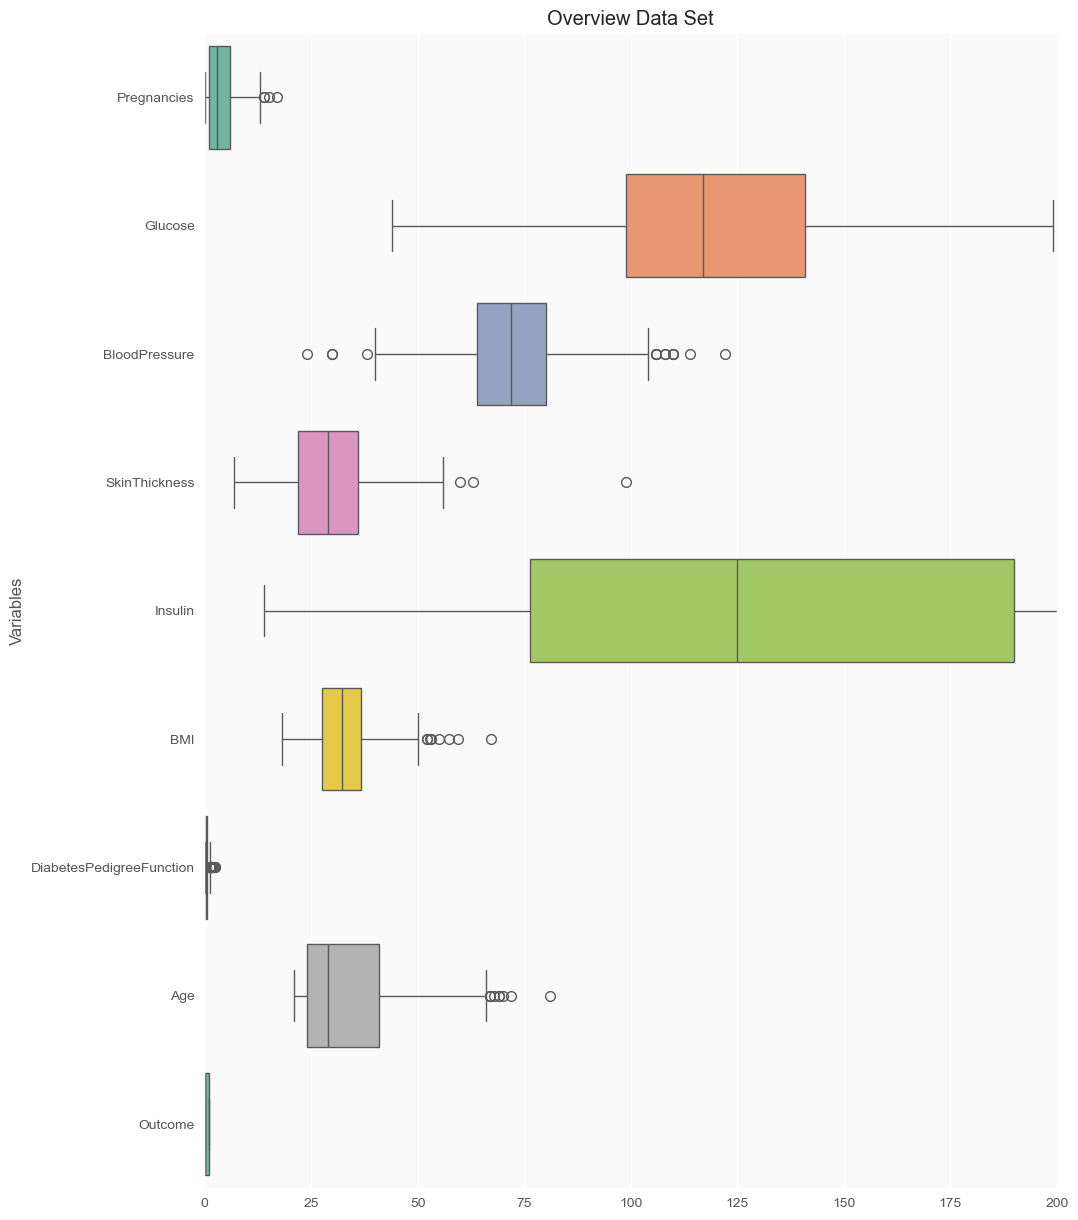

In [20]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

In [21]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

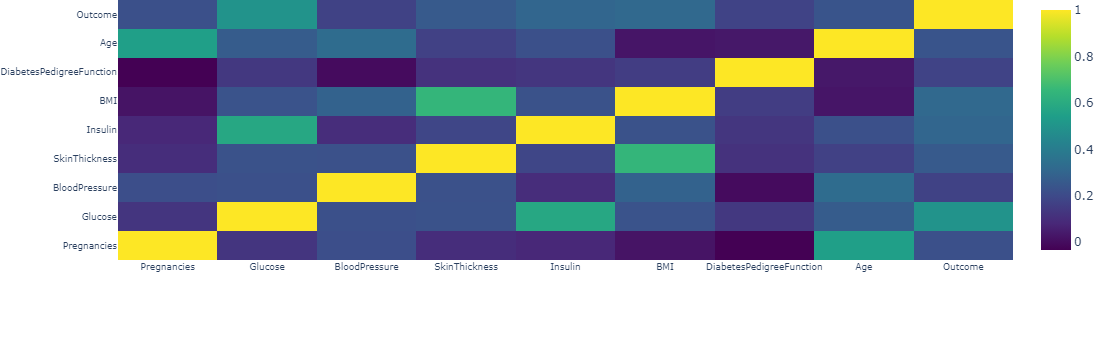

In [22]:
correlation_plot()


In [23]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [24]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

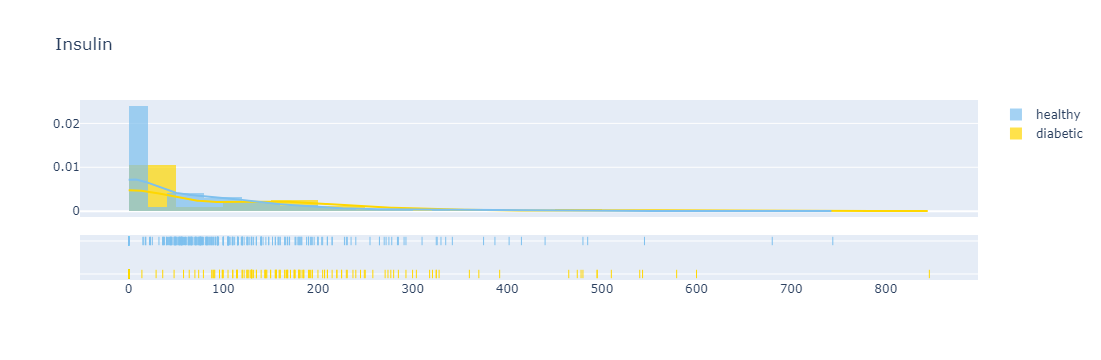

In [25]:
plot_distribution('Insulin', 0)

In [26]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [27]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

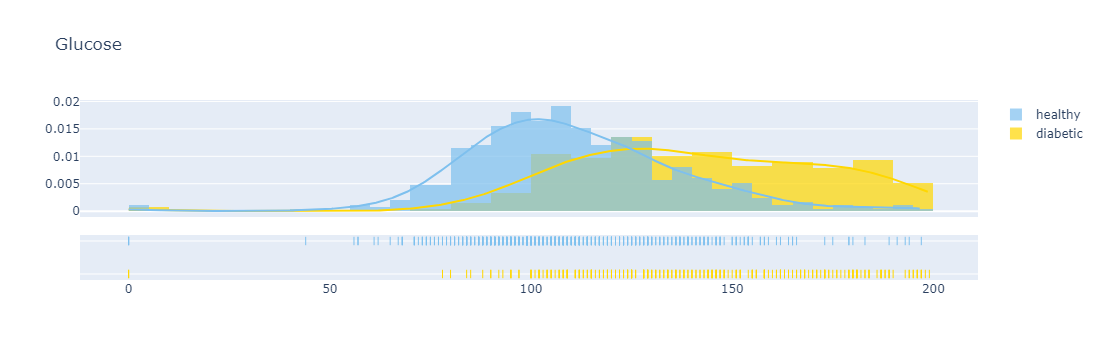

In [28]:
plot_distribution('Glucose', 0)

In [29]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [30]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

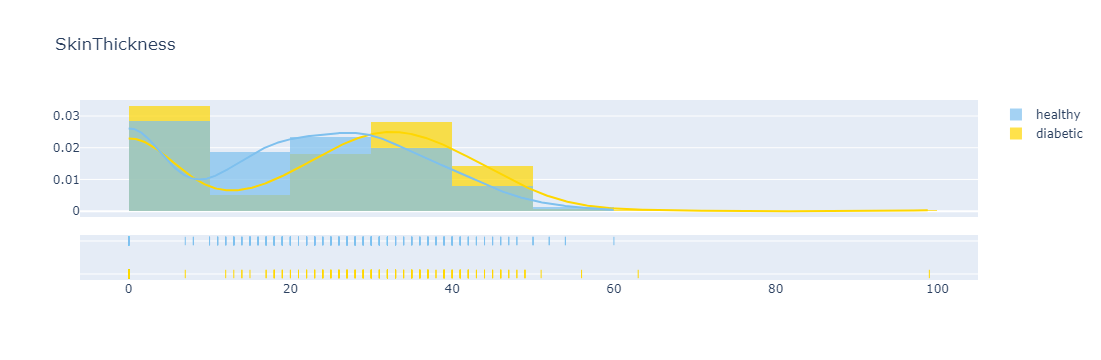

In [31]:
plot_distribution('SkinThickness', 10)

In [32]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [33]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

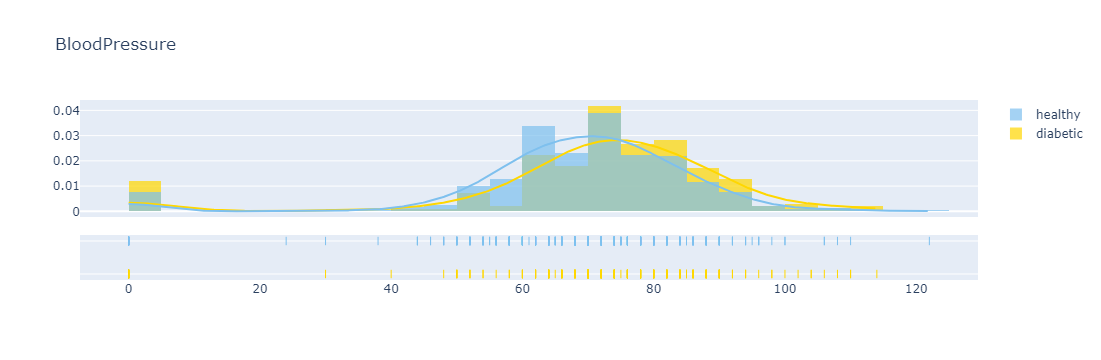

In [34]:
plot_distribution('BloodPressure', 5)

In [35]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [36]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

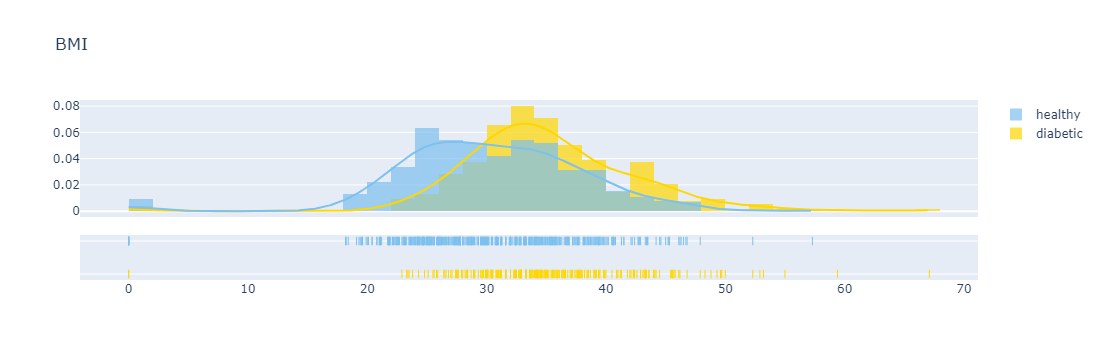

In [37]:
plot_distribution('BMI', 0)

In [38]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [39]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

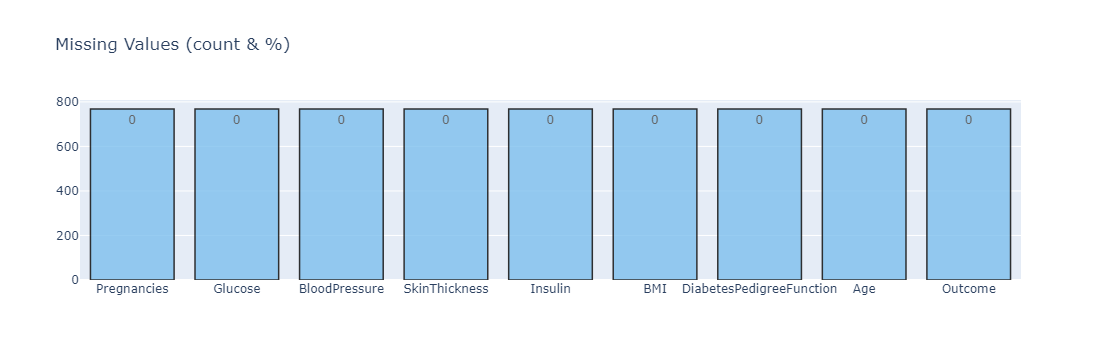

In [40]:
missing_plot(data, 'Outcome')

In [41]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [42]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [43]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

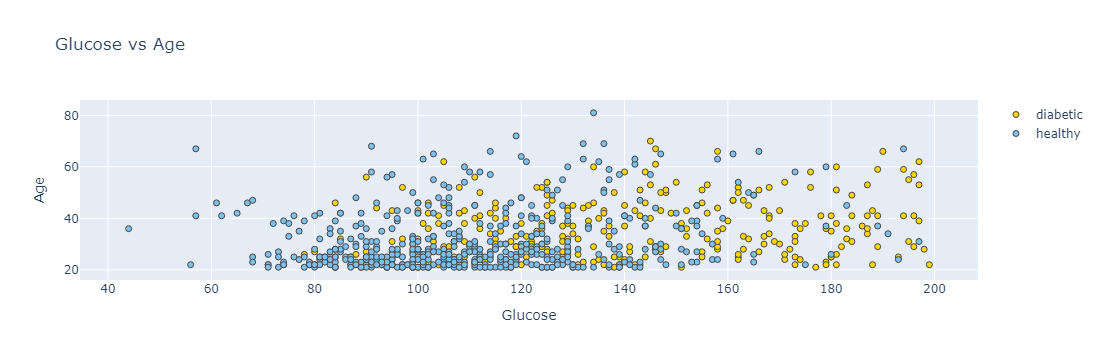

In [44]:
plot_feat1_feat2('Glucose','Age')

In [45]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

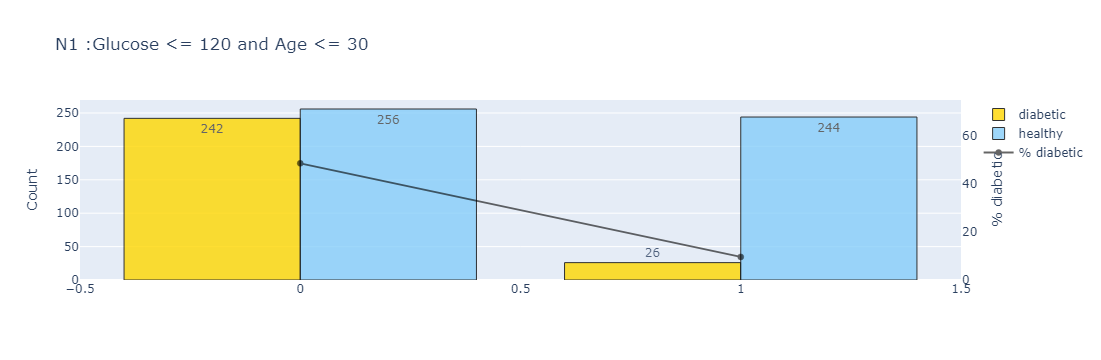

In [46]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [47]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

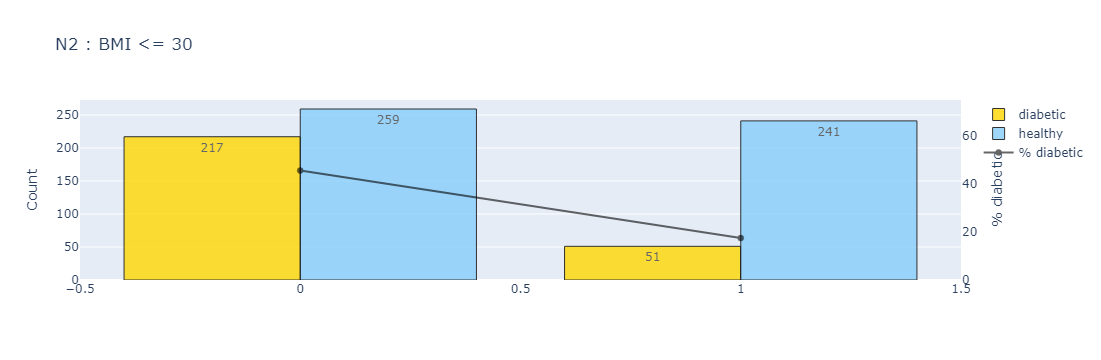

In [48]:
barplot('N2', ': BMI <= 30')

In [49]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

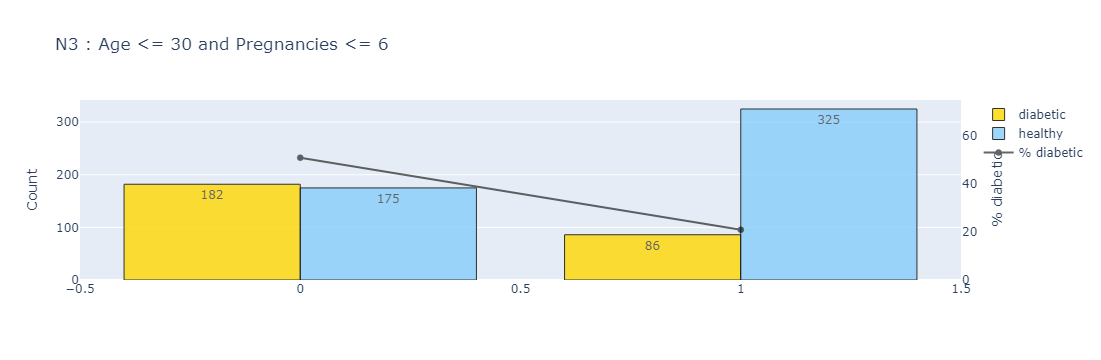

In [50]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [51]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

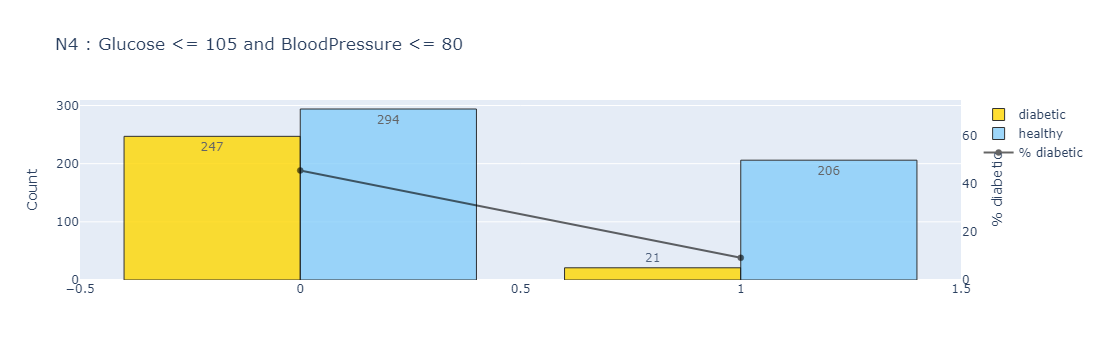

In [52]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [53]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [54]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

In [55]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [56]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

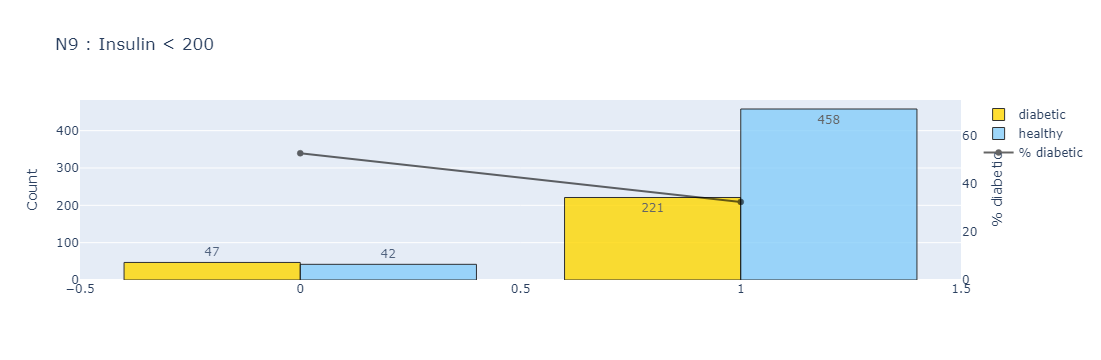

In [57]:
barplot('N9', ': Insulin < 200')

In [58]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [59]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [60]:
#Other features 
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']

In [61]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

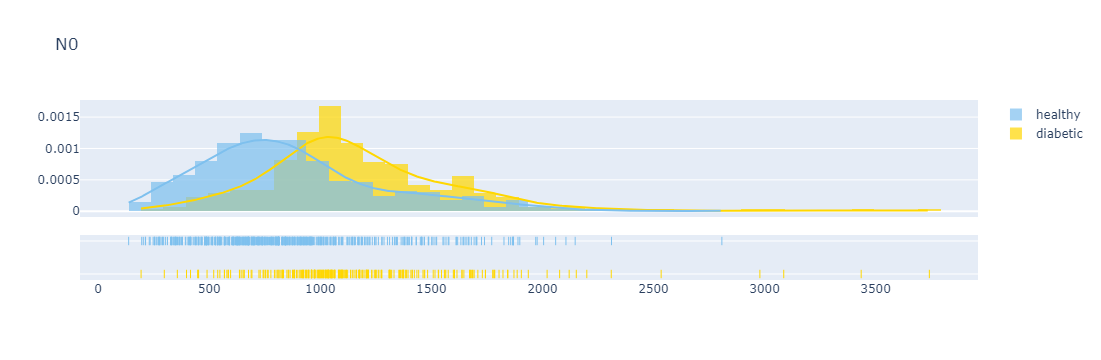

In [62]:
plot_distribution('N0', 0)

In [63]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [64]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [65]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

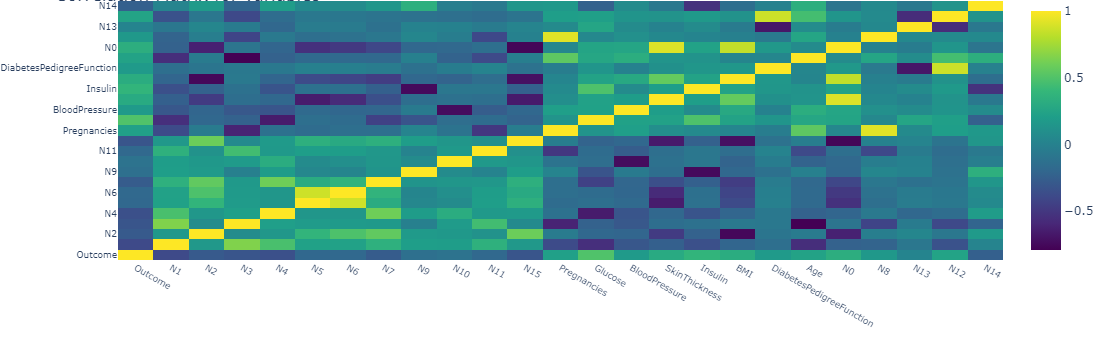

In [66]:
correlation_plot()

In [67]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [68]:
def model_performance(model, subtitle):   
    # Enable shuffling with a fixed random state
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle is now True
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in cv.split(X, y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:, 1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:, 1])
        fpr, tpr, _ = roc_curve(y.iloc[test], pred_proba[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc) 
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=cv)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z=conf_matrix, x=["0 (pred)", "1 (pred)"],
                        y=["0 (true)", "1 (true)"], xgap=2, ygap=2, 
                        colorscale='Viridis', showscale=False)
    
    # Show metrics
    tp = conf_matrix[1, 1]
    fn = conf_matrix[1, 0]
    fp = conf_matrix[0, 1]
    tn = conf_matrix[0, 0]
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Precision = tp / (tp + fp)
    Recall = tp / (tp + fn)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)

    show_metrics = pd.DataFrame(data=[[Accuracy, Precision, Recall, F1_score]]).T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x=show_metrics[0].values, 
                    y=['Accuracy', 'Precision', 'Recall', 'F1_score'], 
                    text=np.round_(show_metrics[0].values, 4),
                    textposition='auto', textfont=dict(color='black'),
                    orientation='h', opacity=1, marker=dict(
            color=colors,
            line=dict(color='#000000', width=1.5)))

    # ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name="ROC Curve",
                        line=dict(color=('rgb(22, 96, 167)'), width=2), fill='tozeroy')
    trace4 = go.Scatter(x=[0, 1], y=[0, 1],
                        line=dict(color='black', width=1.5, dash='dot'))
    
    # Precision - recall curve
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace5 = go.Scatter(x=recall, y=precision,
                        name="Precision-Recall",
                        line=dict(color='lightcoral', width=2), fill='tozeroy')
    
    mean_auc = round(mean_auc, 3)
    # Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                            specs=[[{}, {}], 
                                   [{}, {}]],
                            subplot_titles=('Confusion Matrix',
                                            'Metrics',
                                            'ROC curve' + " " + '(' + str(mean_auc) + ')',
                                            'Precision - Recall curve'))
    # Trace and layout
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 2, 1)
    fig.append_trace(trace4, 2, 1)
    fig.append_trace(trace5, 2, 2)
    
    fig['layout'].update(showlegend=False, title='<b>Model performance report (5 folds)</b><br>' + subtitle,
                         autosize=False, height=830, width=830,
                         plot_bgcolor='black',
                         paper_bgcolor='black',
                         margin=dict(b=195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color='white')
    fig["layout"]["yaxis1"].update(color='white')
    fig["layout"]["xaxis2"].update(dict(range=[0, 1], color='white'))
    fig["layout"]["yaxis2"].update(color='white')
    fig["layout"]["xaxis3"].update(dict(title="false positive rate"), color='white')
    fig["layout"]["yaxis3"].update(dict(title="true positive rate"), color='white')
    fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05], color='white')
    fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05], color='white')
    for i in fig['layout']['annotations']:
        i['font'] = dict(color='white', size=14)
    py.iplot(fig)

In [69]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')

In [70]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

random_state = 42

# Define fit parameters without early stopping rounds and verbose
fit_params = {
    "eval_metric": 'auc',
    "eval_set": [(X, y)],
    'eval_names': ['valid'],
    'categorical_feature': 'auto'
}

param_test = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

# Number of combinations
n_iter = 300

# Initialize LGBMClassifier without silent parameter
lgbm_clf = LGBMClassifier(random_state=random_state, verbose=-1, metric='None', n_jobs=4)

# Initialize RandomizedSearchCV
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True
)

# Fit the model using grid_search
grid_search.fit(X, y, **fit_params)

# Retrieve the best parameters
opt_parameters = grid_search.best_params_

# Train the model with the best parameters and early stopping using callbacks
lgbm_clf = LGBMClassifier(**opt_parameters)
callbacks = [lgb.early_stopping(stopping_rounds=100, verbose=0)]
lgbm_clf.fit(X, y, eval_set=[(X, y)], callbacks=callbacks)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


LGBMClassifier(colsample_bytree=0.9398004671753039, learning_rate=0.08,
               min_child_samples=122, min_child_weight=1e-05, n_estimators=1500,
               num_leaves=22, reg_alpha=0, reg_lambda=50,
               subsample=0.5071129770985692)

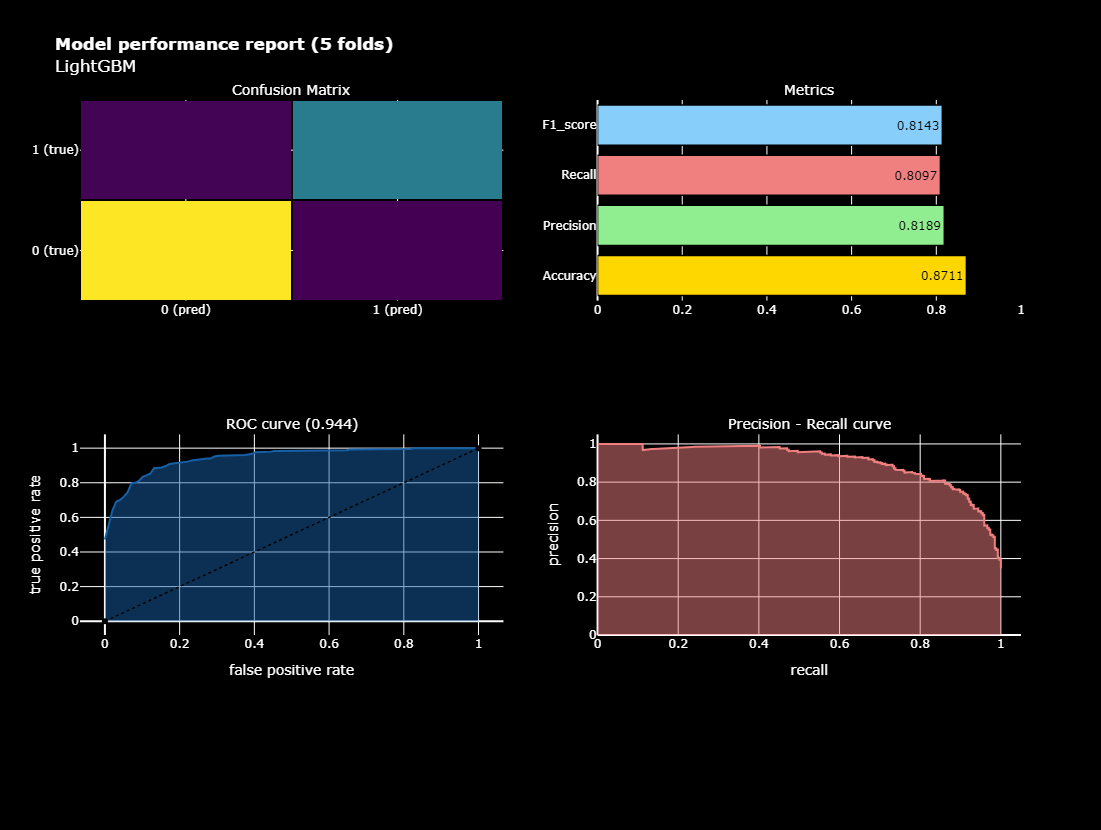

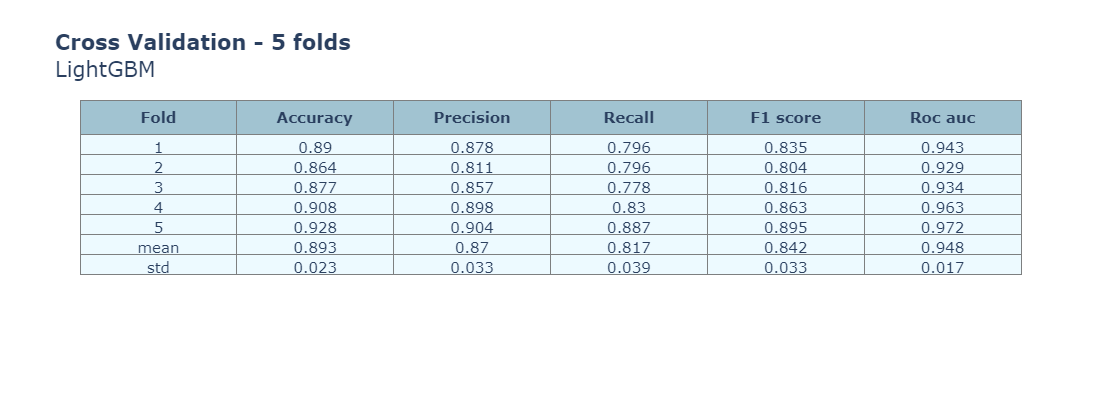

In [71]:
model_performance(lgbm_clf, 'LightGBM')
scores_table(lgbm_clf, 'LightGBM')

In [170]:
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_clf),
    ('knn', KNeighborsClassifier())], voting='soft', weights = [3,1])

params = {
      'knn__n_neighbors': np.arange(1,30)
      }
      
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)

grid.fit(X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Best Score:0.8932857991681521
Best Parameters: {'knn__n_neighbors': 6}


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the grid search on the training data
grid.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_model = grid.best_estimator_

# Predict on the unseen test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing Accuracy on Unseen Data: {accuracy:.4f}")

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the optimal threshold where precision and recall are balanced
optimal_idx = np.argmax(precision + recall)
optimal_threshold = thresholds[optimal_idx]

# Apply the custom threshold to get final predictions
y_pred_custom_threshold = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the model after applying the custom threshold
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(classification_report(y_test, y_pred_custom_threshold))
print(confusion_matrix(y_test, y_pred_custom_threshold))

# Calculate the accuracy with the custom threshold
custom_accuracy = accuracy_score(y_test, y_pred_custom_threshold)
print(f"Accuracy with Custom Threshold: {custom_accuracy:.4f}")

Testing Accuracy on Unseen Data: 0.8615
Optimal Threshold: 0.5079
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       151
           1       0.79      0.82      0.80        80

    accuracy                           0.86       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.86      0.86      0.86       231

[[133  18]
 [ 14  66]]
Accuracy with Custom Threshold: 0.8615


In [163]:
import pickle
from sklearn.ensemble import VotingClassifier

# Assuming grid_search is your trained model (e.g., after performing RandomizedSearchCV)
model = grid_search.best_estimator_

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


In [76]:
import lightgbm as lgb

# Assuming 'X' is your feature matrix and 'lgbm_clf' is your trained LightGBM model
importances = lgbm_clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(importance_df.head(10))

        Feature  Importance
15      Insulin         933
23          N14         460
12      Glucose         405
19           N0         382
18          Age         365
16          BMI         353
11  Pregnancies         301
21          N13         269
22          N12         247
20           N8         246


In [156]:
print(y.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


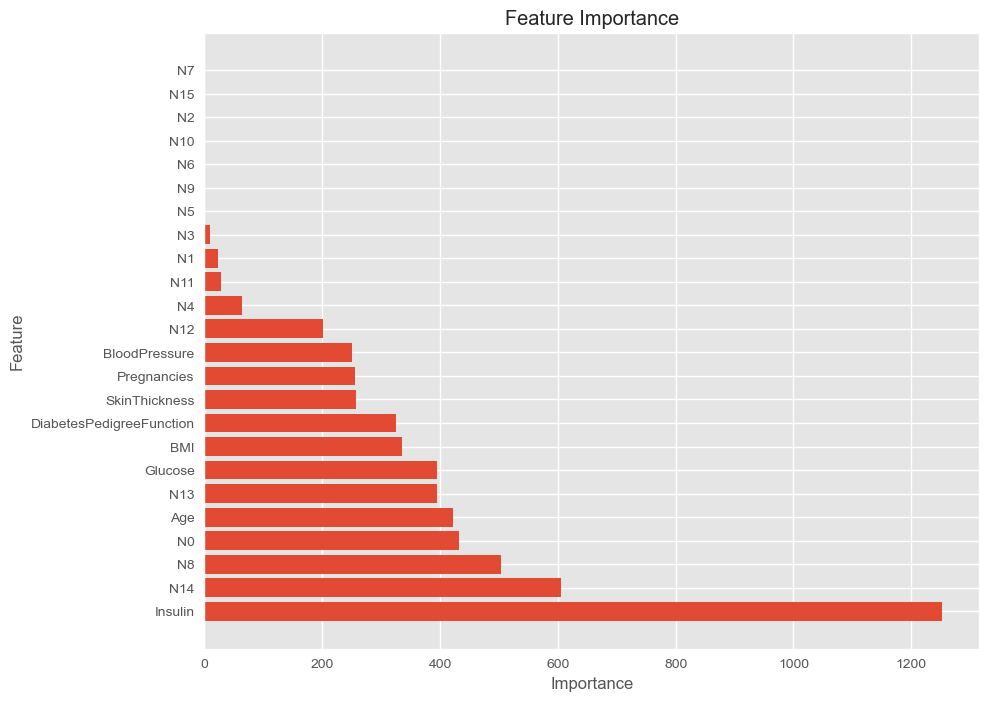

In [158]:
# After training your LightGBM model
lgbm_clf.fit(X, y)

# Plotting feature importance
plt.figure(figsize=(10, 8))
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_clf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [7]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the model
def load_model(model_path):
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        print("Model loaded successfully.")
        return model
    except FileNotFoundError:
        print("Model file not found. Please ensure 'model.pkl' is in the correct location.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the model: {e}")
        return None

model = load_model('model.pkl')

# Function to generate the necessary engineered features
def generate_features(insulin, glucose, age, bmi, pregnancies, skin_thickness, blood_pressure, diabetes_pedigree_function):
    # Create a dictionary with the user inputs
    data = {
        'Insulin': [insulin],
        'Glucose': [glucose],
        'Age': [age],
        'BMI': [bmi],
        'Pregnancies': [pregnancies],
        'SkinThickness': [skin_thickness],
        'BloodPressure': [blood_pressure],
        'DiabetesPedigreeFunction': [diabetes_pedigree_function]
    }
    
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)
    
    # Calculate engineered features
    df['N1'] = np.where((df['Age'] <= 30) & (df['Glucose'] <= 120), 1, 0)
    df['N2'] = np.where(df['BMI'] <= 30, 1, 0)
    df['N3'] = np.where((df['Age'] <= 30) & (df['Pregnancies'] <= 6), 1, 0)
    df['N4'] = np.where((df['Glucose'] <= 105) & (df['BloodPressure'] <= 80), 1, 0)
    df['N5'] = np.where(df['SkinThickness'] <= 20, 1, 0)
    df['N6'] = np.where((df['BMI'] < 30) & (df['SkinThickness'] <= 20), 1, 0)
    df['N7'] = np.where((df['Glucose'] <= 105) & (df['BMI'] <= 30), 1, 0)
    df['N9'] = np.where(df['Insulin'] < 200, 1, 0)
    df['N10'] = np.where(df['BloodPressure'] < 80, 1, 0)
    df['N11'] = np.where((df['Pregnancies'] < 4) & (df['Pregnancies'] != 0), 1, 0)
    
    df['N0'] = df['BMI'] * df['SkinThickness']
    df['N8'] = df['Pregnancies'] / df['Age']
    df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']
    df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']
    df['N14'] = df['Age'] / df['Insulin']
    df['N15'] = np.where(df['N0'] < 1034, 1, 0)
    
    return df

# Test data (you can replace these values with actual test data or user input)
test_data = {
    'Insulin': [0],
    'Glucose': [90],
    'Age': [22],
    'BMI': [27.3],
    'Pregnancies': [2],
    'SkinThickness': [17],
    'BloodPressure': [70],
    'DiabetesPedigreeFunction': [0.085]
}

# Convert to DataFrame and generate features
test_df = pd.DataFrame(test_data)
engineered_features = generate_features(
    test_df['Insulin'][0],
    test_df['Glucose'][0],
    test_df['Age'][0],
    test_df['BMI'][0],
    test_df['Pregnancies'][0],
    test_df['SkinThickness'][0],
    test_df['BloodPressure'][0],
    test_df['DiabetesPedigreeFunction'][0]
)

# Convert the DataFrame to a numpy array for prediction
input_features = engineered_features.values

# Make predictions
if model:
    predictions = model.predict(input_features)
    predictions_proba = model.predict_proba(input_features)
    
    print(f'Prediction: {predictions[0]}')
    print(f'Prediction Probability: {predictions_proba[0][1]:.2f}')
else:
    print("Model is not loaded. Cannot make predictions.")




Model loaded successfully.
Prediction: 1
Prediction Probability: 0.84
